# Machine Learning using Scikit Learn (sklearn)

This notebook demonstrates some of the most useful features of the scikit-learn library. 
The focus is mainly on statistical analysis and model evaluation techniques.

`Scikit-Learn`, also referred to as sklearn, is an open-source Python machine learning library.

It's built on top on `NumPy` (Python library for numerical computing) and `Matplotlib` (Python library for data visualization).


Full Doumentation: https://scikit-learn.org/stable/user_guide.html

In [1]:


We_will_cover = [
    
    "0. End to end scikit learn worksflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/ algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve the model",
    "6. Save and load a trained model"]

## 0 : End to end scikit learn worksflow

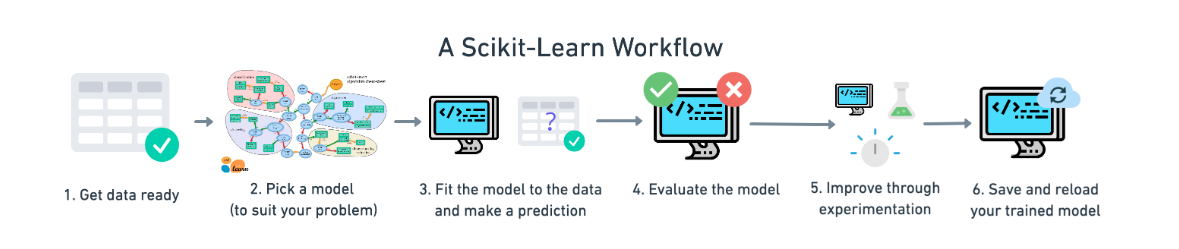

In [2]:
from IPython.display import Image

Image("images/scikit.png")

Note: all of the steps in this notebook are focused on supervised learning (having data and labels).

## 1 : Getting the data ready


In [3]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
heart_disease= pd.read_csv("heart-disease.csv")

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#303 rows x 14 cols

Each row is a different patient and all columns except target are different patient characteristics. target indicates whether the patient has heart disease (target = 1) or not (target = 0).

In [7]:
# Create X (called features matrix)
x = heart_disease.drop("target", axis = 1)

# Create Y ( called target matrix)
y = heart_disease['target']

                

## 2 : Choose the right estimator/ algorithm for our problems

In [8]:
# Choose the right model and hyperparameters
# RandomForestClassifier is a classification machine-learning model

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Using use a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3 : Fit the model/algorithm and use it to make predictions on our data

Fitting the model on the data involves passing it the data and asking it to figure out the patterns.

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels.

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
clf.fit(x_train, y_train);

 Making prediction now...

In [13]:
# Possibility of error
# y_label= clf.predict(np.array([0,2,3,4]))

In [14]:
y_preds = clf.predict(x_test) # Use the model to make a prediction on the test data (further evaluation)
y_preds

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [15]:
y_test

186    0
246    0
8      1
170    0
140    1
      ..
179    0
189    0
212    0
15     1
301    0
Name: target, Length: 61, dtype: int64

## 4 : Evaluate the model on training data and test data

In [16]:
clf.score(x_train, y_train)

1.0

In [17]:
clf.score(x_test, y_test)

0.8360655737704918

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print(classification_report (y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        34
           1       0.77      0.89      0.83        27

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [20]:
confusion_matrix(y_test, y_preds)

array([[27,  7],
       [ 3, 24]])

In [21]:
accuracy_score(y_test, y_preds)

0.8360655737704918

## 5 : Improve the model

Try different amount of n_estimators

* Accuracy shows how often a classification ML model is correct overall. 
* Precision shows how often an ML model is correct when predicting the target class.
* Recall shows whether an ML model can find all objects of the target class

* https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall

In [22]:
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 20 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 30 estimators...
Model accuracy on test set: 83.60655737704919%

Trying model with 40 estimators...
Model accuracy on test set: 85.24590163934425%

Trying model with 50 estimators...
Model accuracy on test set: 83.60655737704919%

Trying model with 60 estimators...
Model accuracy on test set: 83.60655737704919%

Trying model with 70 estimators...
Model accuracy on test set: 81.9672131147541%

Trying model with 80 estimators...
Model accuracy on test set: 83.60655737704919%

Trying model with 90 estimators...
Model accuracy on test set: 83.60655737704919%



In [23]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, x, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.24590163934425%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 83.60655737704919%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 83.60655737704919%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 81.9672131147541%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 81.9672131147541%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 81.9672131147541%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 81.9672131147541%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 85.24590163934425%
Cross-validation score: 82.81420765027322

## 6 : Save a model for someone else to use 

import pickle

> #pickle.dump(clf, open("random_forest__model_1.pkl", "wb"))

> loaded_model = pickle.load(open("random_forest__model_1.pkl", "rb"))
> loaded_model.score(x_test, y_test)

In [24]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
executable: /Users/shum/miniconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.25.2
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libopenblas
       filepath: /Users/shum/miniconda3/lib/python3.11/site-packages/numpy/.dylibs/libopenblas64_.0.dylib
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: libomp
       filepath: /Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/.dylibs/libomp.dylib
        version: None

       user_api: blas
   internal_api: openblas
    num_threads

In [25]:
We_will_cover

['0. End to end scikit learn worksflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/ algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve the model',
 '6. Save and load a trained model']

 **Let us get started!**

# `Secton 1`

#standard imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting data Ready to be used for ML


Data doesn't always come ready to use with a Scikit-Learn machine-learning model.

The steps to be taken:

- Splitting the data into features (usually X) and labels (usually y)
- Filling (also called imputing) or disregarding missing values
- Converting non-numerical values to numerical values (also call feature encoding)


In [27]:
# Splitting the data into X & y
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [31]:
# 80% of data is being used for the test set 
x.shape[0]*0.8

242.4

### 1.1 Convert data to numbers/make numerical

Turn the "Make" and "Colour" columns into numbers

In [32]:
# Import car-sales-extended.csv
car_sales = pd.read_csv("car-sales-extended.csv")

In [33]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [34]:
len(car_sales)

1000

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
# Split the data into x and y

x = car_sales.drop("Price", axis = 1)

# Create Y ( called target matrix)
y = car_sales['Price'] 

In [37]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [38]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [39]:
# Split into train and test sets

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2)

Let us try to build the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

model.score(x_test, y_test)

**This will run into error as car type is not categorical yet, must change data type for string Nissan**

In [40]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [43]:
x.iloc[0]

Make             Honda
Colour           White
Odometer (KM)    35431
Doors                4
Name: 0, dtype: object

**Another way to convert the data into numerical is using Dummies**

In [44]:
dummies = pd.get_dummies(car_sales[["Make","Colour", "Doors"]]).astype(int) #convert doors to object for dummies to work on it
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [45]:
# The categorical categories are now either 1 or 0...
x["Make"].value_counts()

Make
Toyota    398
Honda     304
Nissan    198
BMW       100
Name: count, dtype: int64

In [46]:
# Let us refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y, 
                                                    test_size=0.2)

model.fit(x_train, y_train);

In [47]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [48]:
model.score(x_test, y_test)

0.0

et voila!!

### 1.2 How about dealing with missing values now?

1. Fill them with some value also known as imputation
2. Remove the samples with missing data

In [49]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [50]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#let's try and convert data into numbers again

In [52]:
# Create y and z 
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [53]:
# Turn the categories into numbers
# Let's convert the categorical columns to one hot encoded 
# Turn the categories (Make and Colour) into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

We'll have to either fill or remove the missing values.

In [54]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### 1.2.1 Option 1: Let's fill missing data with Pandas

In [55]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

# Note: The practice of filling missing data is called imputation

In [56]:
# Quick check on dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [57]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [58]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [59]:
len(car_sales_missing)

950

In [60]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


Note: The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.

In [61]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


In [62]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [63]:
# Now let's one-hot encode the categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#### 1.2.2 Option 2: Fill missing values with Scikit-Learn

Scikit-learn provides another method called `SimpleImputer()` which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given strategy.

Here filling and transforming the entire dataset (x) and although the techniques are correct, it's best to fill and transform training and test sets separately (as shown in the code below).

The main takeaways:

- Split your data first (into train/test)
- Fill/transform the training set and test sets separately

In [64]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [65]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [66]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [67]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)

# Drop the rows with no label
car_sales_missing.isna().sum()


Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [68]:
# Split into x and y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [69]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [70]:
y.isna().sum()

0

**Note**: We split data into train & test to perform filling missing values on them separately.

In [71]:
# Filling missing values with Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & "numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features ),
    ("door_imputer",door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [72]:
car_sales_filled = pd.DataFrame(filled_x, 
                                columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [73]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [74]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, 
                                  categorical_features)], 
                                remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [76]:
y.isna().sum()

0

In [77]:
transformed_x.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [78]:
# We have data our data as numbers and filled (no missing values)
# Let us fit the model now

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor() # Make sure to use transformed (filled and one-hot encoded X data)
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.21990196728583944

# `Section 2`

## 2. Choosing the right estimator for your problem

ML Models/Algortihms are called estimators in Scikit 

Classification problem - predicting a category (heart disease or not)
Regression problem - predicting a category (selling price of a car)

(clf is the short for classification estimator/classification model variable name)

Understand the ML models according to the problem : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


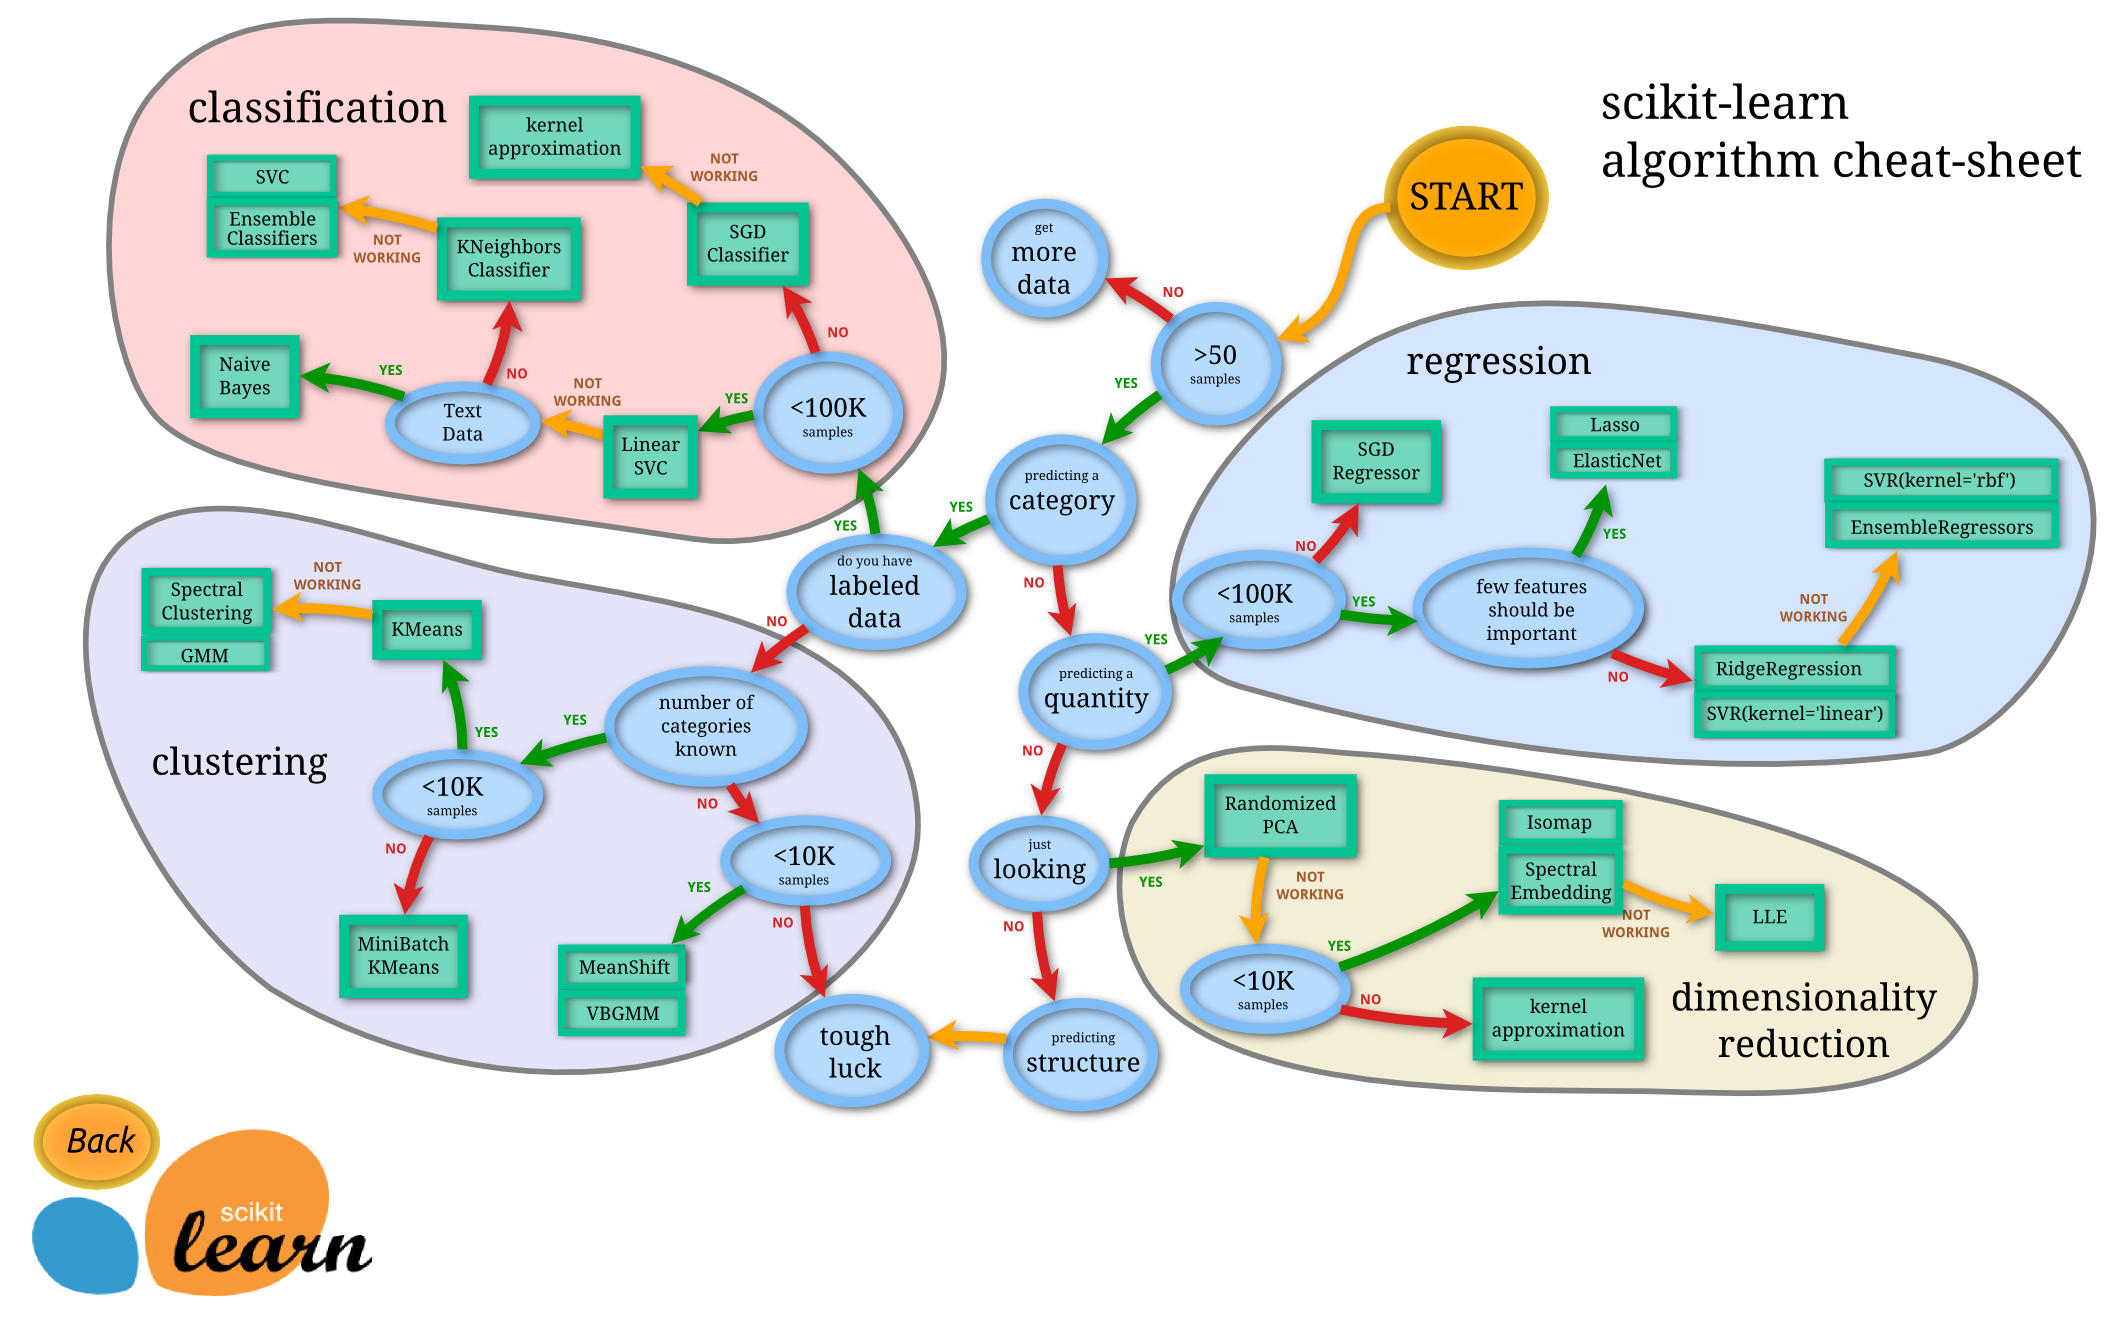

In [79]:
Image("images/sklearn-ml-map.png")

### 2.1 Picking a Machine Learning Model for a Regression Problem

In [80]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [81]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])

In [82]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [83]:
housing_df.size

165120

In [84]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [85]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [86]:
housing_df = housing_df.drop("MedHouseVal", axis = 1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Trying different ML models and categories**

In [87]:
# Import algorithm /estimator
from sklearn.linear_model import Ridge

# Set up random seed
np.random.seed(42)

#Create the data
x = housing_df.drop('target', axis=1)
y = housing_df["target"] #mediam house price in $100,000s

#Split the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

#Instantiate and fit the model
model = Ridge()
model.fit(x_train, y_train)

#Check the score of the model on the test set
model.score(x_test, y_test)

0.5758549611440126

**r2** , coefficient of determination assesses how strong the linear relations is between two variables
This coefficient is the default regression evaluation metric

OR you can say how predictive are the features of the target variable
 * RandomForrestRegressor which is based on what we call a Decision Tree
EnsembleRegressors. Ensemble is another word for multiple models put together to make a decision.

_estimator = 100 default

Random Forest Regressor can be used for both regression AND classifications models

In [88]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

#Create the data
x = housing_df.drop('target', axis=1)
y = housing_df["target"] #mediam house price in $100,000s

#Split the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.8066196804802649

### 2.2 Choosing an estimator for a classification problem / picking a machine learning model

heart_disease= pd.read_csv("heart-disease.csv") # Get the data 

In [89]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**target column** - whether heart disease or NOT > classification

In [90]:
len(heart_disease)

303

Consulting the map which says LinearSVC

In [91]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]



In [92]:

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)   

# Evaluate the LinearSVC
clf.score(x_test, y_test)

/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [93]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [94]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)   

# Evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

> recommendation is if the data is structured-----> use ensemble method

> recommendation is if the data is unstructured-----> use deep learning or transfer learning

# `Section 3`

## 3.1  - Fitting the model to data

> x = features, features variables, data
> 
> y = labels, targets, target variables

In [95]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()


# Fit the model to the data --> #Training the machine learning model which will use the patterns while in production to provide the output
# x ---> y / f(x) = y
clf.fit(x_train, y_train)   

# Evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

In [96]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [97]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## 3.2 Make predictions using a Machine Learning Model

### Use a trained model to make predictions

Two ways to make predictions:
1. `predict()`
2. `predict_proba()`

### Make predictions with `predict()`

In [98]:
x_test.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [99]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [100]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [101]:
# Compare predictions to truth labels to evaluate the model

# Frist method

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [102]:
# Second method

clf.score(x_test, y_test)

0.8524590163934426

In [103]:
# Third method

from sklearn.metrics import accuracy_score


In [104]:
accuracy_score(y_test, y_preds)

0.8524590163934426

 GORGEOUS!!!!

### Make predictions with `predict_proba()`

In [105]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

let us see `predict()` on regression models

In [106]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [107]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create Data
x = housing_df.drop("target", axis = 1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [108]:
y = housing_df["target"]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [109]:
# Split the data
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2)

In [110]:
# Create model instance OR instantiate the class RandomForestRegressor
model = RandomForestRegressor() #defaut or (n_estimator=10)

model.fit(x_train, y_train)


RandomForestRegressor()

In [111]:
# Make prediction
y_preds = model.predict(x_test)

In [112]:
y_preds[:10]

array([1.23346  , 3.9007018, 1.96461  , 0.95506  , 1.6487704, 3.1585203,
       1.67631  , 4.4288521, 1.46763  , 2.9496   ])

In [113]:
np.array(y_test[:10])

array([1.03   , 3.821  , 1.726  , 0.934  , 0.965  , 2.648  , 1.573  ,
       5.00001, 1.398  , 3.156  ])

In [114]:
len(y_preds)

16512

In [115]:
len(y_test)

16512

#MEAN ABS ERROR - avg diff between predicted values and true values

In [116]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3791375126029556

# `Section 4`

## 4. Evaluating a Machine Learning Model

Three ways to evaluate Scikit Lern models/estimators:

1. Estimator's built in score method
2. The Scoring parameter
3. Problem specific Metric functions

 read more here: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating with score method

Score Method on Classification

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
np.random.seed(42)

In [119]:
# Create x and y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]


In [120]:
# Create train and test
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2)

# Instantiate classififer or create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to the training data
clf.fit(x_train, y_train);

In [121]:
clf.score(x_train, y_train) # not to be scored using on train set, ofcourse!

1.0

In [122]:
clf.score(x_test, y_test) # good

0.7892561983471075

RandomForest is one of the most powerful and fastest ensemble algorithms

Let's use the `score()` on our regression problem...

In [123]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# Create x and y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
# Create train and test
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2)

# Instantiate Regressor or create a Regressor model instance
model = RandomForestRegressor(n_estimators=2)

# Fit classifier to the training data
model.fit(x_train, y_train);

model.score(x_test, y_test)

0.05683934607160113

 The default score() evaluation matrix of regression is r_squared for regression algos
 Highest = 1, lowest = 0


## 4.2 Evaluating with score parameter

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [125]:
np.random.seed(42)

In [126]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train);


In [127]:
clf.score(x_test, y_test)

0.7892561983471075

In [128]:
cross_val_score(clf, x, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

splitting into an arbitrary number of 5 for cross validation above

In [129]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take mean of 5 fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score


(0.7892561983471075, 0.8248087431693989)

In [130]:
# Scoring parameter is set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

#### 1. **Accuracy**

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv = 5)

In [132]:
cross_val_score 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [133]:
np.mean(cross_val_score)

0.8248087431693989

#mean accuracy of the model is 0.8248087431693989

In [134]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


In [135]:
# 82.48% likely to be a correct model / accurate model to predict  label ('target')

In [136]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2. **Area under the ROC curve**

** area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve
* ROC curve

ROC curves are a comparison of a model's true postive TPR v/s false positive rate FPR

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [137]:
from sklearn.metrics import roc_curve

In [138]:
# Create sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [139]:
# Fit the classifier
clf.fit(x_train, y_train)

RandomForestClassifier()

In [140]:
# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]



array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [141]:
len(y_probs)

61

In [142]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [143]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

#Now let us visualize this, which should make more sense

In [144]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """

         

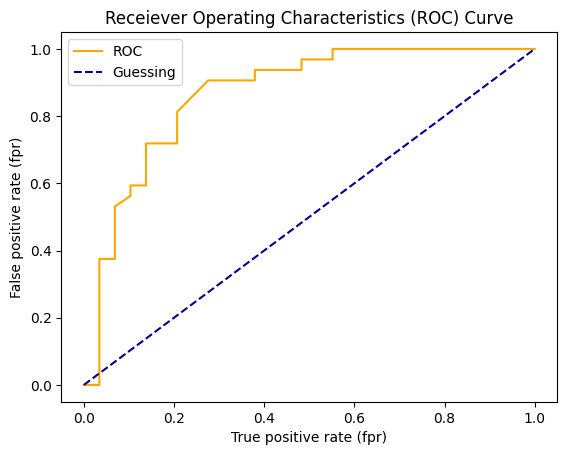

In [145]:
# Plot roc curve
plt.plot(fpr, tpr, color= "orange", label="ROC")

# Plot line with no predictive power (baseline)
plt.plot([0,1], [0,1], color = "darkblue", linestyle="--", label="Guessing")

# Customize the plot
plt.xlabel("True positive rate (fpr)")
plt.ylabel("False positive rate (fpr)")
plt.title("Receiever Operating Characteristics (ROC) Curve")
plt.legend()
plt.show()

plot_roc_curve(fpr, tpr)

In [146]:
from sklearn.metrics import roc_auc_score # checking auc along

In [147]:
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

Plot perfect ROC curve and AUC score

*fpr, tpr, thresholds = roc_curve(y_test, y_test)

*plot_roc_curve(fpr, tpr)

In [148]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**In a nutshell:**

* ROC curves and AUC metrics are evaluation metrics for binary classification models 
(a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) 
at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes 
(for example, how well it is at deciding whether someone has heart disease or not).
A perfect model will get an AUC score of 1.

#### 3. **Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and actual labels it was supposed to predict

In essence, givin you an idea of where the model is getting confused.

In [149]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [150]:
# Vislualize confusion matrix with pd.rosstab()
pd.crosstab(y_test, y_preds, rownames = ["Actual Label"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [151]:
len(y_preds)

61

#sum of 23+26+6+6 is same as len

In [152]:
# Make confusion matrix with Seaborn (lib built on the tp of matplotlib) heatmap
import seaborn as sns


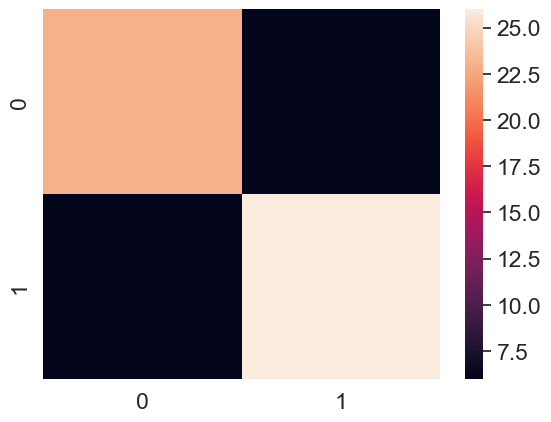

In [153]:
# Set font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plit it using seaborn
sns.heatmap(conf_mat);

**Creating a confusion matrix using Scikit Learn**

Sklearn version 1.0 +

In [154]:
import sklearn
sklearn.__version__

'1.3.0'

1) From Estimator and
2) From Predictions

*ConsfusionMatrixDisplay is the class

In [155]:
clf

RandomForestClassifier()

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay

In [157]:
x.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        

In [158]:
y_train

71     1
26     1
49     1
72     1
241    0
      ..
127    1
255    0
160    1
252    0
190    0
Name: target, Length: 242, dtype: int64

In [159]:
clf.fit(x_train, y_train)

RandomForestClassifier()

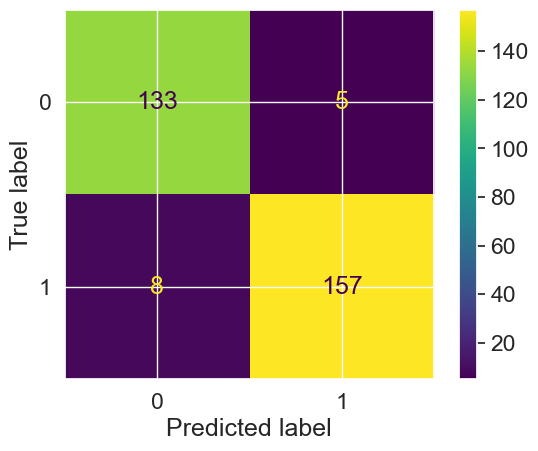

In [160]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y) 

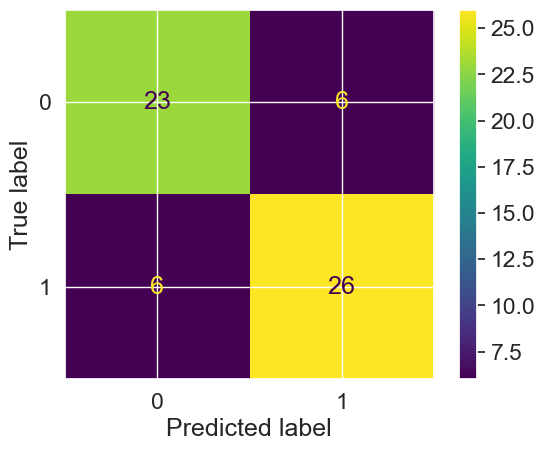

In [161]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

*Classification Report, a number of evaluation metrics ratehr than single one

#### 4. **Classification Report**

In [162]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. 
A model which produces no false positives has a precision of 1.0.
    
* **Recall** - Indicates the proportion of actual positives which were correctly classified. 
    A model which produces no false negatives has a recall of 1.0.
    
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

...where can a wide spectrum of classification can be used (where is class imbalance)
let us say 10k people, one of them has disease - who?

### <class imbalance>

In [164]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #(only one positive case)

disease_preds = np.zeros(10000) #model predicts every case 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

`Accuracy` is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

`Precision` and recall become more important when classes are imbalanced.

If false positive predictions are worse than false negatives, aim for higher precision.

If false negative predictions are worse than false positives, aim for higher recall.

`F1-score` is a combination of precision and recall.

## 4.2.2 Regression model evaluation metrics

* R^2 (pronounced r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Crux = compare models for what they have predicted vs what they should have predicted - goof!

In [165]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df["target"] = housing["target"]
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


R^2

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.

In [166]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)



In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [168]:
RandomForestRegressor()

RandomForestRegressor()

In [169]:
model.score(x_test, y_test)

0.5106393318965518

In [170]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [171]:
y_test.mean()

0.5245901639344263

In [172]:
from sklearn.metrics import r2_score

In [173]:
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [174]:
y_test_mean[:10]

array([0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016])

In [175]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [176]:
r2_score(y_true=y_test, y_pred=y_test) # fun!!

1.0

Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [177]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.23754098360655734

In [178]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
179,0,0.03,0.03
228,0,0.58,0.58
111,1,0.47,-0.53
246,0,0.13,0.13
60,1,0.81,-0.19
9,1,0.86,-0.14
119,1,0.73,-0.27
223,0,0.03,0.03
268,0,0.01,0.01
33,1,0.45,-0.55


In [179]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.23754098360655734

Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

In [180]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.12204426229508197

In [181]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [182]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.12204426229508197

In [183]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

/var/folders/85/b2g6jpgx1kx6dpr7dk0qq4rr0000gn/T/ipykernel_8563/3223351396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample


In [184]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [185]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.12204426229508197

In [186]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,20.0000
111,1,0.47,-0.53,20.0000
246,0,0.13,0.13,20.0000
60,1,0.81,-0.19,20.0000
...,...,...,...,...
249,0,0.52,0.52,20.0000
104,1,0.99,-0.01,20.0000
300,0,0.03,0.03,20.0000
193,0,0.00,0.00,20.0000


In [187]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

19.672145901639343


**Notes:**

`Classification Model Evaluation Metrics/Techniques`

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.


`Regression Model Evaluation Metrics/Techniques`

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

`Which regression metric should you use?`

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

## 4.2.3  Using the scoring parameter

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

classification model and the heart disease dataset

In [189]:
import numpy as np
import pandas as pd

In [190]:
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [191]:
np.random.seed(42)

In [192]:
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]



In [193]:
clf = RandomForestClassifier(n_estimators=100)

In [194]:
np.random.seed(42)

* We can find the same using the scoring parameter and passing it `accuracy`, `precision`, `recall`, `f1` and `regression`

In [195]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

*values for cv = 5 for cross validation splits

In [196]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [197]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")

In [198]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [199]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


* Hence proved, the results are same as accuracy on default

* Quick note : Precision is a model wth no false positive (quality) while Recall is a model with no false negatives (quantity)

In [200]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [201]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [202]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [203]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


*  the scoring parameter being using for a regression problem

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [205]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [206]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [207]:
# Mean squared error
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4302688111843372

TIP: neg version is for `scoring parameter` method to have the higher return values rather than lower as in `mean squared error`

In [208]:
cv_mse

array([-0.52532899, -0.34772023, -0.37442475, -0.43896032, -0.46490977])

In [209]:
# Mean absolute error
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46681015659399233

In [210]:
cv_mae

array([-0.54518527, -0.41051585, -0.43822943, -0.46672399, -0.47339624])

##  4.2.4 Metric functions

#### Evaluating with ScikitLearn Functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics`m

In [211]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [212]:
np.random.seed(42)

In [213]:
#Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [214]:

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Create model
clf = RandomForestClassifier()

#Fit the model
clf.fit(x_train, y_train)

#Make predictions
y_preds = clf.predict(x_test)

#Score model/Evaluate the estimator using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
np.random.seed(42)

#Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Create model
clf = RandomForestClassifier()

#Fit the model
clf.fit(x_train, y_train)

#Make predictions
y_preds = clf.predict(x_test)



In [219]:
# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.40840517241379315
MAE: 0.14754098360655737
MSE: 0.14754098360655737


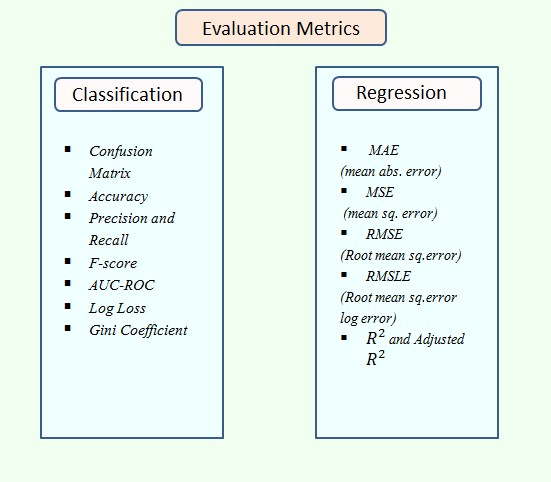

In [220]:
from IPython.display import Image

Image("images/metrics.png")


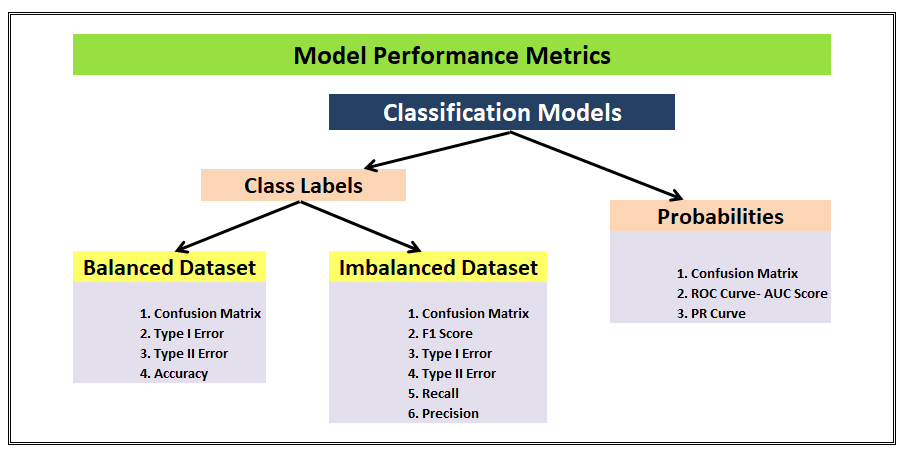

In [221]:
Image("images/metrics1.png")

# `Section 5`

## 5. Improving a model / hyperparamater tuning

> First predictions = baseline predictions
> 
> First model = baseline model

A. Improve from a data perspective:
* Could we collect more data?
* Could we improve the data?

B. Improve from the model perspective:
* Is there a better model to use simple or complex?
* Could we improve the current model?

`Parameter` = model find these patterns in data

`Hyperparameter` = settings on a model you can adjust to improve the ability to find patterns

Let us learn through an example and understand itsey-bitsssssy bettah!

In [222]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [223]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Three ways to adjust hyperparameter

* By hand
* RandomSearchCV
* Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test

Hyperparameteres tuning is done on the validation set

Below is the list of hyperparameters

In [224]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust the following:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [225]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict

In [226]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
np.random.seed(42)

In [229]:
# Shuffle the data using pandas sample function
heart_disease_shuffled = heart_disease.sample(frac=1)

In [230]:
# Split into x and y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

* Understand in the context of indices

In [231]:
# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

In [232]:
len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [233]:
clf = RandomForestClassifier()

In [234]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [235]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [236]:
# Make baseline predictions
y_preds = clf.predict(x_valid)

In [237]:
# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [238]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### 5.2 Tuning hyperparameters with RandomSearchCV

In [239]:
from sklearn.model_selection import RandomizedSearchCV

In [240]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

 wooohoo! dense and lovely!

In [241]:
np.random.seed(42)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Set up Randomized Search CV
rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid,
                            n_iter = 10, cv = 5, verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/

In [242]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [243]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


* RandomSearchCV is so cool! 

Rather than tuning hyperparameters by hand it gives us a way to codify the tuning of hyperparameters

### 5.1 Tuning hyperparameters GridSearchCV

In [244]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

key diff: n_iter (RandSearchCV) / bruteforce search (GridSearchCV)

Let's learn confined space usage / grids

In [245]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [246]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/

In [247]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

* et voila c'est le gateau!

In [248]:
# Make prediction
gs_y_preds = gs_clf.predict(x_test)

In [249]:
# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### Let's compare our different models metrics.

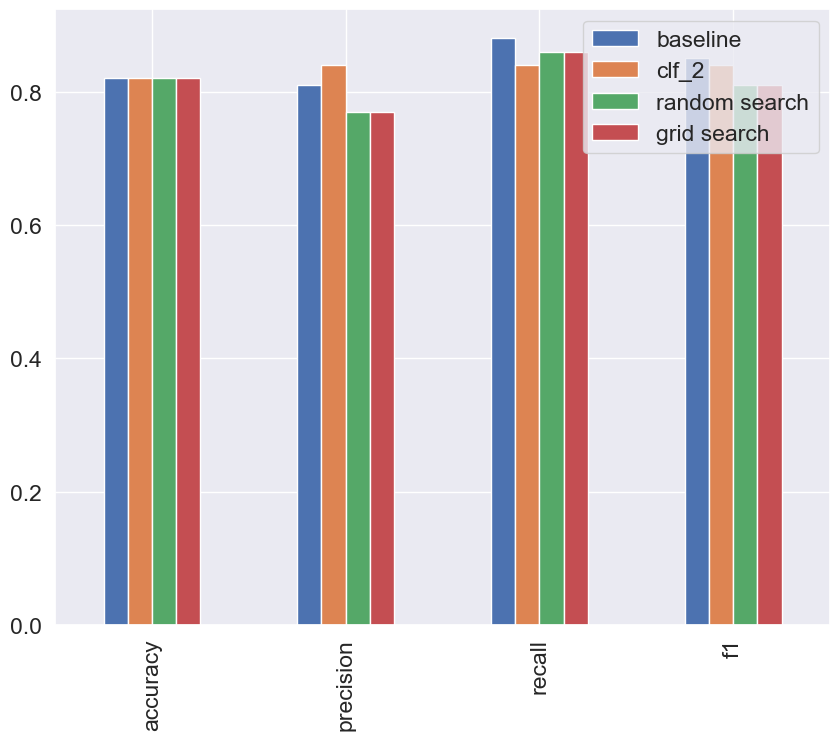

In [250]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

Do we have a winner? #Two.
Congratulations/Felicitations!

As always, when comparing models, you should be careful to make sure they're compared on the same splits of data.

For example, let's say you have model_1 and model_2 which each differ slightly.

If you want to compare and evaluate their results, model_1 and model_2 should both be trained on the same data (e.g. X_train and y_train) and their predictions should each be made on the same data, for example:

**model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds**

**model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds**

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

# `Section 6`

## 6. Save and load trained machine learning model

Two ways to save and load machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module

`The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.`

`the model will be the python object`

In [251]:
import pickle
# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model1.pkl", "wb"))

* the grid search model is now saved

In [252]:
# Load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model1.pkl", "rb"))

In [253]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

Acc: 88.52%
Precision: 0.82
Recall: 1.00
F1 score: 0.90 , same as gs above hence model worked

`joblib`

`Joblib is a set of tools to provide lightweight pipelining in Python.`

In [254]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [255]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [256]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [257]:
from IPython.display import Image


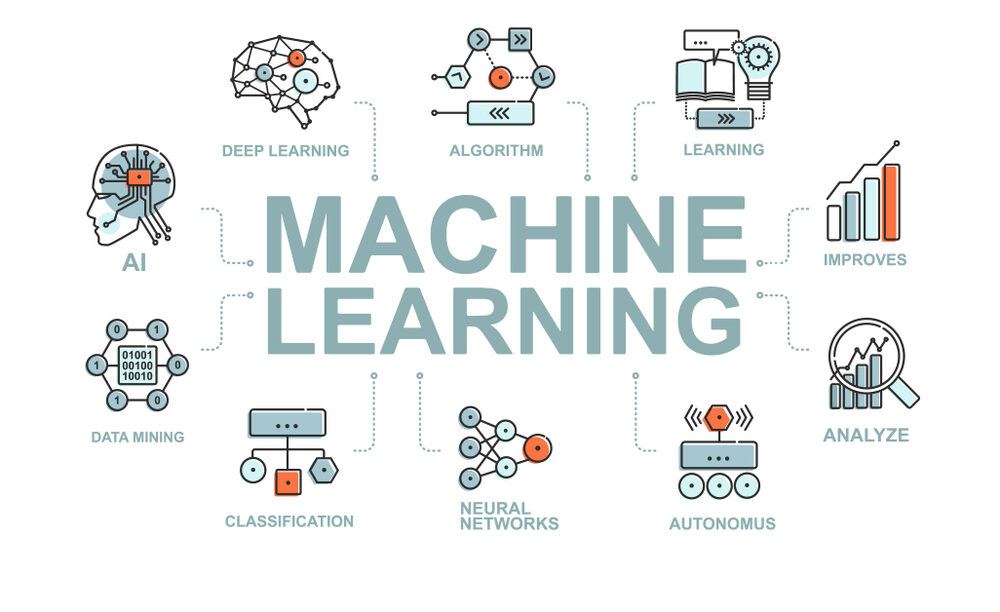

In [258]:
Image("images/ML 2.jpg")